In [ ]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
plt.rcParams['font.family'] = 'Ms Gothic'

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# NumPyの浮動小数点の表示精度
np.set_printoptions(suppress = True, precision = 4)
# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format
# データフレームですべての項目を表示
pd.set_option('display.max_columns', None)
# グラフのデフォルトフォントの指定
plt.rcParams['font.size'] = 14
# 乱数の種
random_seed = 123

In [ ]:
# 混同行列表示用関数

def make_cm(matrix, columns):
    # matrix numpy配列

    # columns 項目名リスト
    n = len(columns)

    # '正解データ'をn回繰り返すリスト生成
    act = ['正解データ'] * n
    pred = ['予測結果'] * n

    #データフレーム生成
    cm = pd.DataFrame(matrix,
        columns=[pred, columns], index=[act, columns])
    return cm

In [ ]:
#  day.csvをデータフレームに取り込む
# 日付を表す列はparse_datesで指定する
df = pd.read_csv('df4.csv', parse_dates = [0], encoding='Shift JIS')

# データ属性の確認
print(df.dtypes)

日付        datetime64[ns]
年                  int64
月                  int64
日                  int64
曜日                 int64
祝日                 int64
店休日                int64
平均気温             float64
最高気温             float64
最低気温             float64
降水量の合計           float64
日照時間             float64
積雪予測               int64
平均風速             float64
最大風速             float64
チラシ                int64
来客数              float64
dtype: object


In [ ]:

# 先頭5行の確認
display(df.head())

# 最終5行を確認
display(df.tail())

,日付,年,月,日,曜日,祝日,店休日,平均気温,最高気温,最低気温,降水量の合計,日照時間,積雪予測,平均風速,最大風速,チラシ,来客数
0,2020-12-01,2020,12,1,2,0,0,9.5000,14.6000,3.9000,0.0000,8.1000,0,1.6000,3.7000,0,2795.5301
1,2020-12-02,2020,12,2,3,0,0,8.0000,10.5000,6.0000,3.5000,0.0000,0,2.6000,4.1000,1,2750.5926
2,2020-12-03,2020,12,3,4,0,0,8.5000,10.7000,6.6000,0.5000,0.0000,0,2.1000,3.6000,1,2901.0809
3,2020-12-04,2020,12,4,5,0,0,9.0000,13.7000,6.0000,0.0000,6.5000,0,2.1000,3.6000,1,2905.2611
4,2020-12-05,2020,12,5,6,0,0,6.7000,8.1000,3.7000,4.5000,0.0000,0,2.0000,3.9000,1,2906.3062


,日付,年,月,日,曜日,祝日,店休日,平均気温,最高気温,最低気温,降水量の合計,日照時間,積雪予測,平均風速,最大風速,チラシ,来客数
1090,2023-11-26,2023,11,26,0,0,0,8.2000,9.0000,6.7000,0.0000,0.0000,0,2.3000,4.0000,1,3160.0000
1091,2023-11-27,2023,11,27,1,0,0,11.3000,16.7000,7.2000,0.0000,5.0000,0,1.2000,2.8000,1,3333.0000
1092,2023-11-28,2023,11,28,2,0,0,15.7000,22.0000,6.6000,0.0000,9.3000,0,2.6000,6.6000,1,2796.0000
1093,2023-11-29,2023,11,29,3,0,0,10.0000,17.2000,2.7000,0.0000,9.4000,0,1.6000,5.3000,1,2968.0000
1094,2023-11-30,2023,11,30,4,0,0,10.1000,17.0000,4.7000,0.0000,5.8000,0,1.8000,3.8000,1,2693.0000


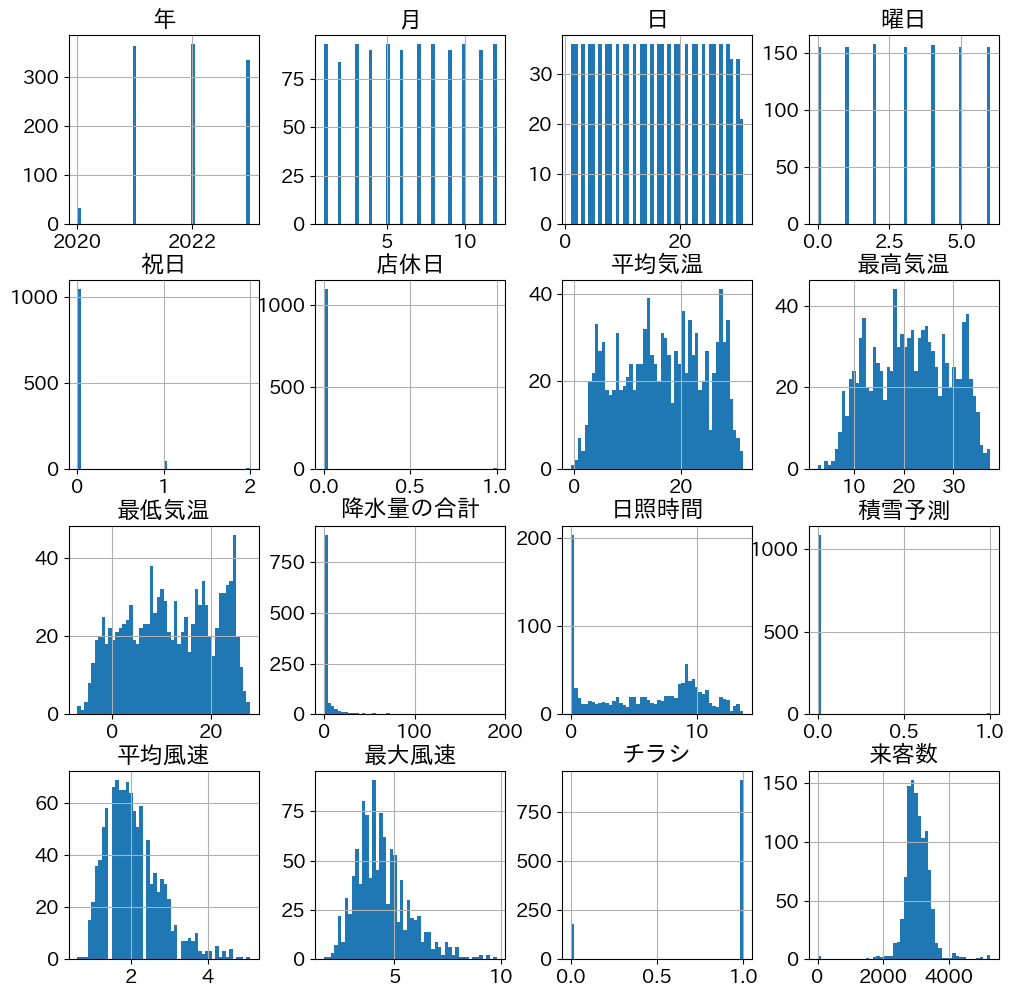

In [ ]:
# 度数分布表示
import japanize_matplotlib
# グラフのサイズ調整のためのおまじない
from pylab import rcParams
rcParams['figure.figsize'] = (12, 12)

# 日付の列を削除
df_not_day = df.drop(['日付'], axis = 1)

# データフレームの数値項目でヒストグラム表示
df_not_day.hist(bins = 50)
plt.show()

In [ ]:
# 欠損値チェック
df.isnull().sum()

日付        0
年         0
月         0
日         0
曜日        0
祝日        0
店休日       0
平均気温      0
最高気温      0
最低気温      0
降水量の合計    0
日照時間      0
積雪予測      0
平均風速      0
最大風速      0
チラシ       0
来客数       0
dtype: int64

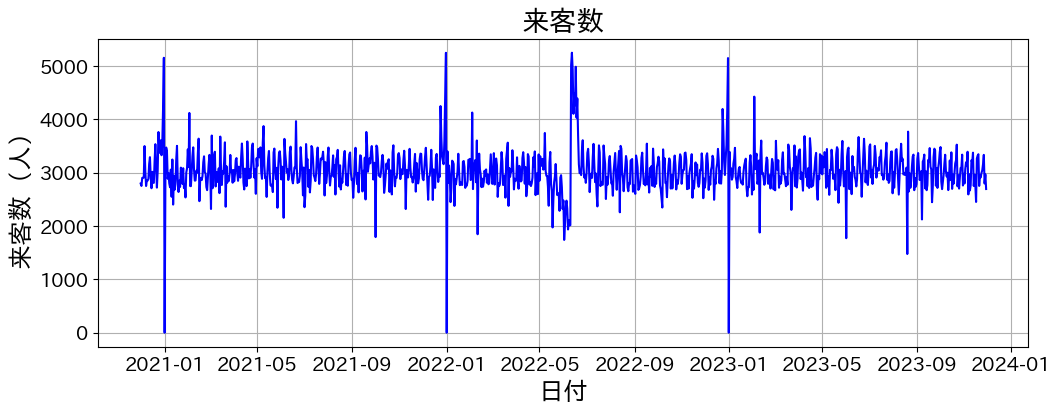

In [ ]:
# 時系列グラフの描画（登録ユーザー利用数）
plt.figure(figsize = (12, 4))

# グラフ描画
plt.plot(df['日付'], df['来客数'], c = 'b')

# 軸ラベル
plt.xlabel('日付', size = 18)
plt.ylabel('来客数（人）', size = 18)

# 方眼表示など
plt.grid()
plt.title('来客数', size = 20)

# 画面出力
plt.show()

In [ ]:
x = df.drop(['日付','来客数'], axis = 1)
y = df['来客数'].values

In [ ]:
# 分割日mdayの設定
# '2023-04-01'
# '2022-12-01'
# '2023-06-01'
# '2023-09-01'

mday = pd.to_datetime('2023-09-01')

# 訓練用indexと検証用indexを作る
train_index = df['日付'] < mday
test_index = df['日付'] >= mday

# 入力データの分割
x_train = x[train_index]
x_test = x[test_index]

# yも同様に分割
y_train = y[train_index]
y_test = y[test_index]

# 日付データの分割（グラフ表示用）
dates_test = df['日付'][test_index]

In [ ]:
# 結果確認（サイズを確認）
print(x_train.shape)
print(x_test.shape)

# 結果確認（境界値を重点的に）
display(x_train.tail())
display(x_test.head())


(1004, 15)
(91, 15)


,年,月,日,曜日,祝日,店休日,平均気温,最高気温,最低気温,降水量の合計,日照時間,積雪予測,平均風速,最大風速,チラシ
999,2023,8,27,0,0,0,27.7000,33.0000,23.9000,0.0000,5.6000,0,2.2000,3.9000,1
1000,2023,8,28,1,0,0,29.0000,34.3000,24.8000,0.0000,5.3000,0,1.9000,4.0000,0
1001,2023,8,29,2,0,0,28.9000,33.6000,24.9000,0.0000,11.9000,0,2.3000,5.4000,0
1002,2023,8,30,3,0,0,28.5000,32.8000,23.5000,0.0000,10.2000,0,2.3000,4.5000,1
1003,2023,8,31,4,0,0,28.6000,32.7000,25.5000,0.0000,9.2000,0,2.9000,5.1000,1


,年,月,日,曜日,祝日,店休日,平均気温,最高気温,最低気温,降水量の合計,日照時間,積雪予測,平均風速,最大風速,チラシ
1004,2023,9,1,5,0,0,28.3000,32.9000,22.5000,0.0000,12.0000,0,2.7000,5.5000,1
1005,2023,9,2,6,0,0,28.3000,33.1000,23.8000,0.0000,9.5000,0,1.8000,3.9000,1
1006,2023,9,3,0,0,0,28.8000,34.0000,24.8000,3.5000,3.3000,0,2.3000,4.2000,1
1007,2023,9,4,1,0,0,26.5000,30.9000,24.2000,19.0000,1.7000,0,2.4000,4.4000,1
1008,2023,9,5,2,0,0,29.1000,33.5000,25.0000,0.0000,12.0000,0,2.8000,5.4000,1


In [ ]:

# アルゴリズム選択
# XGBRegressorを選択する
from xgboost import XGBRegressor
algorithm = XGBRegressor(objective = 'reg:squarederror', random_state = random_seed)

In [ ]:
# 来客数予測モデルの学習と予測

# 学習
algorithm.fit(x_train, y_train)

# 予測
y_pred = algorithm.predict(x_test)

# 予測結果確認
print(y_pred[:5])

[3020.463  3253.9363 3412.2212 3033.924  2933.949 ]


In [ ]:
# 評価（来客数）

# score関数の読み出し
score = algorithm.score(x_test, y_test)

# R2値の計算
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

# 結果確認
print(f'score：{score:.4f}　r2_score：{r2_score:.4f}')

score：0.3976　r2_score：0.3976


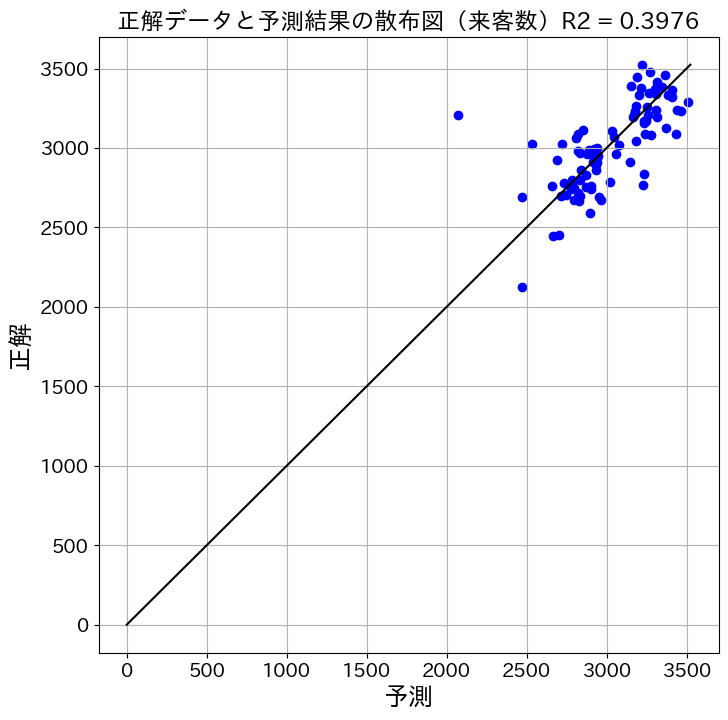

In [ ]:
# 正解データと予測結果を散布図で比較（来客数）
plt.figure(figsize = (8, 8))
y_max = y_test.max()
plt.plot((0, y_max),  (0, y_max), c = 'k')
plt.scatter(y_pred, y_test, c = 'b')
plt.title(f'正解データと予測結果の散布図（来客数）R2 = {score:.4f}')
plt.xlabel("予測", size = 18)
plt.ylabel("正解", size = 18)
plt.grid()
plt.show()

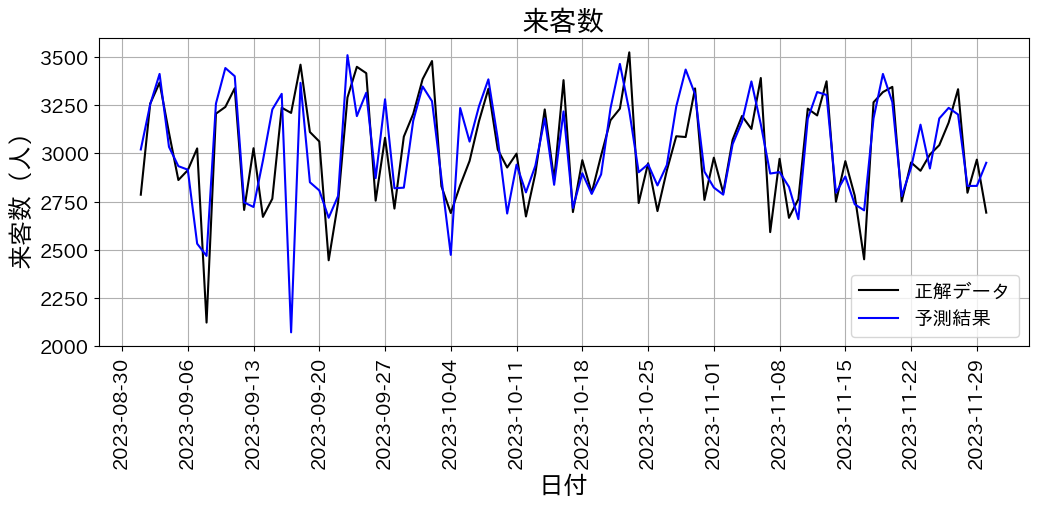

In [ ]:

# 時系列グラフの描画（来客数）
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize = (12, 4))

# グラフ描画
ax.plot(dates_test, y_test, label = '正解データ', c = 'k')
ax.plot(dates_test, y_pred, label = '予測結果', c = 'b')

# 日付目盛間隔
# 水曜日ごとに日付を表示
weeks = mdates.WeekdayLocator(byweekday = mdates.WE)
ax.xaxis.set_major_locator(weeks)

# 日付表記を90度回転
ax.tick_params(axis = 'x', rotation = 90)

# 軸ラベル
ax.set_xlabel('日付', size = 18)
ax.set_ylabel('来客数（人）', size = 18)

# 方眼表示など
ax.grid()
ax.legend()
ax.set_title('来客数', size = 20)

# 画面出力
plt.show()

In [ ]:
# 項目をOne-Hotエンコーディングするための関数
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df.drop([column], axis = 1), df_dummy], axis = 1)
    return df

# 項目「年」「月」「日」「曜日」「店休日」「チラシ」をOne-Hotエンコーディングする

x2 = x.copy()
x2 = enc(x2, '年')
x2 = enc(x2, '月')
x2 = enc(x2, '日')
x2 = enc(x2, '曜日')
x2 = enc(x2, '店休日')
x2 = enc(x2, 'チラシ')

# 結果確認
display(x2.head())

,祝日,平均気温,最高気温,最低気温,降水量の合計,日照時間,積雪予測,平均風速,最大風速,年_2020,年_2021,年_2022,年_2023,月_1,月_2,月_3,月_4,月_5,月_6,月_7,月_8,月_9,月_10,月_11,月_12,日_1,日_2,日_3,日_4,日_5,日_6,日_7,日_8,日_9,日_10,日_11,日_12,日_13,日_14,日_15,日_16,日_17,日_18,日_19,日_20,日_21,日_22,日_23,日_24,日_25,日_26,日_27,日_28,日_29,日_30,日_31,曜日_0,曜日_1,曜日_2,曜日_3,曜日_4,曜日_5,曜日_6,店休日_0,店休日_1,チラシ_0,チラシ_1
0,0,9.5000,14.6000,3.9000,0.0000,8.1000,0,1.6000,3.7000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,8.0000,10.5000,6.0000,3.5000,0.0000,0,2.6000,4.1000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,0,8.5000,10.7000,6.6000,0.5000,0.0000,0,2.1000,3.6000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,9.0000,13.7000,6.0000,0.0000,6.5000,0,2.1000,3.6000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,0,6.7000,8.1000,3.7000,4.5000,0.0000,0,2.0000,3.9000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [ ]:
# 来客数モデル(チューニング後)　ノートブック

# Split the data based on mday
x2_train = x2[train_index]
x2_test = x2[test_index]

# Instantiate and fit the XGBoostRegressor model
algorithm2 = XGBRegressor(objective='reg:squarederror', random_state=random_seed)
algorithm2.fit(x2_train, y_train)

# Make predictions
y_pred2 = algorithm2.predict(x2_test)

# Check the first 5 predictions
print(y_pred2[:5])

[2983.7773 3208.9653 3441.1484 3173.6558 2919.8828]


In [ ]:
# 評価(来客数) (チューニング後) ノートブック

# score関数の呼び出し
score2 = algorithm2.score(x2_test, y_test)

# 結果確認
print(f'score: {score2:.4f}')


score: 0.4781


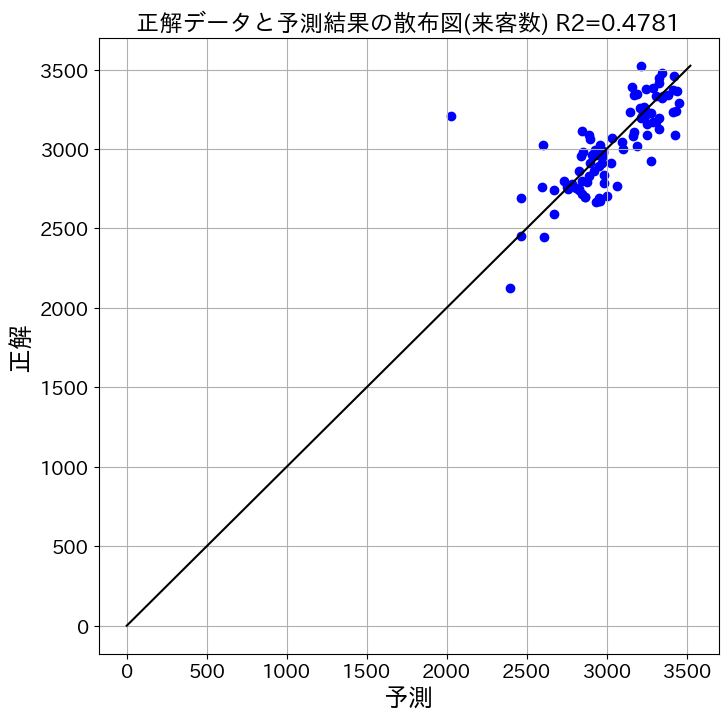

In [ ]:

#正解データと予測結果を散布図で比較 (来客数) ノートブック
plt.figure(figsize=(8, 8))
y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), c='k')
plt.scatter(y_pred2, y_test, c='b')
plt.xlabel("予測", size = 18)
plt.ylabel("正解", size = 18)
plt.title(f'正解データと予測結果の散布図(来客数) R2={score2:.4f}')
plt.grid()
plt.show()

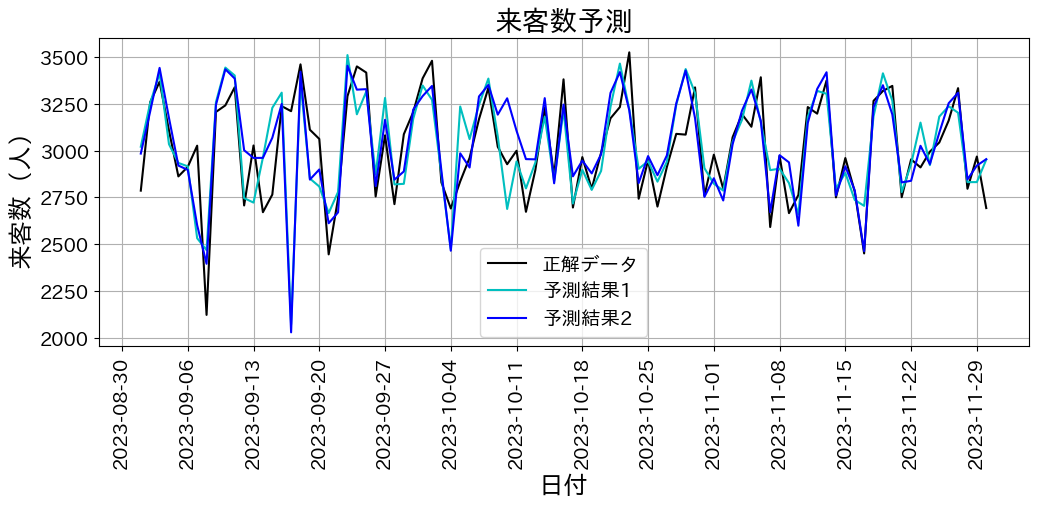

In [ ]:

# 時系列グラフの描画 (チューニング後 来客数) ノートブック
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 4))

# グラフ描画
ax.plot(dates_test, y_test, label='正解データ', c='k')
ax.plot(dates_test, y_pred, label='予測結果1', c='c')
ax.plot(dates_test, y_pred2, label='予測結果2', c='b')

# 日付目盛間隔
weeks = mdates.WeekdayLocator(byweekday=mdates.WE)
ax.xaxis.set_major_locator(weeks)

# 日付書式
ax.tick_params(axis='x', rotation=90)

# 軸ラベル
ax.set_xlabel('日付', size = 18)
ax.set_ylabel('来客数（人）', size = 18)

# 方眼表示など
ax.grid()
ax.legend()
ax.set_title('来客数予測', size = 20)

# 画面出力
plt.show()

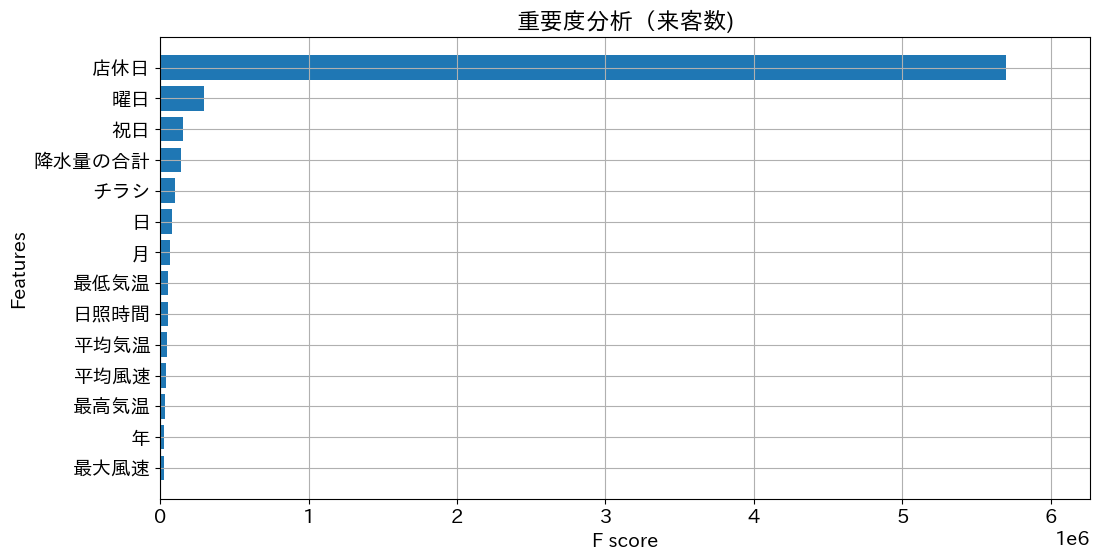

In [ ]:

# 来客数に対する重要度分析
import xgboost as xgb
fig, ax = plt.subplots(figsize = (12, 6))
xgb.plot_importance(algorithm, ax = ax, height = 0.8, importance_type = 'gain', show_values = False,
                   title = '重要度分析（来客数)')
plt.show()
